In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , precision_score, recall_score , f1_score , roc_auc_score
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder , StandardScaler


In [19]:
df = pd.read_csv("../data/processed/cleandata.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,target,thal_6,thal_7,ca_1,ca_2,ca_3,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0
0,0.948726,1.0,1.0,0.757525,-0.264900,1.0,0.017197,0.0,1.087338,0,True,False,False,False,False,False,True,False,True
1,1.392002,1.0,4.0,1.611220,0.760415,0.0,-1.821905,1.0,0.397182,1,False,False,False,False,True,False,True,True,False
2,1.392002,1.0,4.0,-0.665300,-0.342283,0.0,-0.902354,1.0,1.346147,1,False,True,False,True,False,False,True,True,False
3,-1.932564,1.0,3.0,-0.096170,0.063974,0.0,1.637359,0.0,2.122573,0,False,False,False,False,False,False,False,False,True
4,-1.489288,0.0,2.0,-0.096170,-0.825922,0.0,0.980537,0.0,0.310912,0,False,False,False,False,False,False,True,False,False


In [20]:
df1 = df.copy()

In [21]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,target,thal_6,thal_7,ca_1,ca_2,ca_3,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0
0,0.948726,1.0,1.0,0.757525,-0.264900,1.0,0.017197,0.0,1.087338,0,True,False,False,False,False,False,True,False,True
1,1.392002,1.0,4.0,1.611220,0.760415,0.0,-1.821905,1.0,0.397182,1,False,False,False,False,True,False,True,True,False
2,1.392002,1.0,4.0,-0.665300,-0.342283,0.0,-0.902354,1.0,1.346147,1,False,True,False,True,False,False,True,True,False
3,-1.932564,1.0,3.0,-0.096170,0.063974,0.0,1.637359,0.0,2.122573,0,False,False,False,False,False,False,False,False,True
4,-1.489288,0.0,2.0,-0.096170,-0.825922,0.0,0.980537,0.0,0.310912,0,False,False,False,False,False,False,True,False,False


In [3]:
#log transform to correct right skewness in 'oldpeak'
df['oldpeak'] = np.log1p(df['oldpeak'])


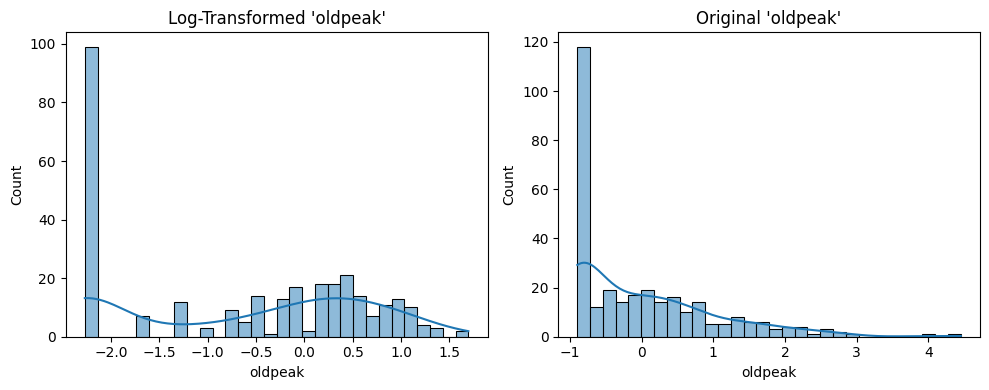

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['oldpeak'], bins=30, ax=axes[0], kde=True)
axes[0].set_title("Log-Transformed 'oldpeak'")
sns.histplot(np.expm1(df['oldpeak']), bins=30, ax=axes[1], kde=True)
axes[1].set_title("Original 'oldpeak'")
plt.tight_layout()
plt.show()


In [5]:
scaler = StandardScaler()
num_features = [ "oldpeak"]  
df[num_features] = scaler.fit_transform(df[num_features])

In [7]:
X = df.drop(columns =['target'])
y = df['target']
X_train , X_test , y_train , y_test = train_test_split(X, y , random_state = 42 , test_size = 0.20 , stratify = y )


Accuracy: 0.8361
Precision: 0.8000
(important metric here)Recall (Sensitivity): 0.8571
F1 Score: 0.8276
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84        33
           1       0.80      0.86      0.83        28

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



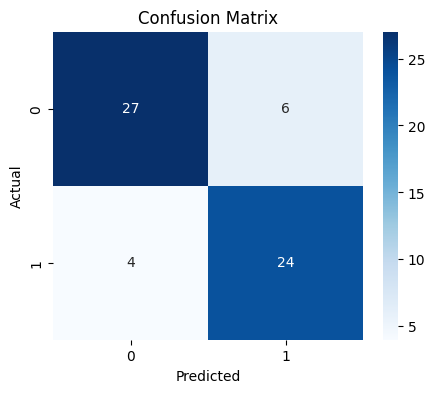

In [ ]:
# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, y_prob[:,1])
print(f"Precision: {precision:.4f}")
print(f"(important metric here)Recall (Sensitivity): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

#confsuion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# These values show that oldpeak without  log transformation gives better values for the model

C:\Users\bhava\AppData\Local\Temp\ipykernel_22536\892460987.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importance", y="Feature", palette="inferno")


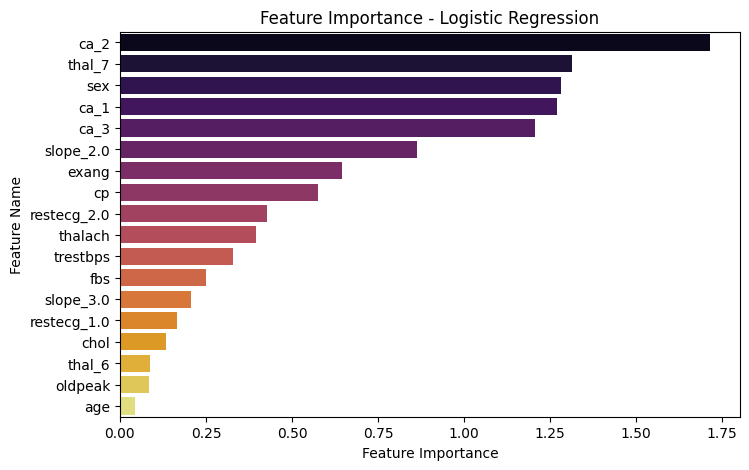

In [10]:
#absolute mean importance across all classes
feature_importance = np.mean(np.abs(model.coef_), axis=0)

importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="inferno")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance - Logistic Regression")
plt.show()

In [22]:
# Removing 'age' feature  
df1 = df1.drop(columns = ['age'])

In [23]:
scaler = StandardScaler()
num_features = [ "oldpeak"]  
df1[num_features] = scaler.fit_transform(df1[num_features])

In [24]:
X = df1.drop(columns =['target'])
y = df1['target']
X_train , X_test , y_train , y_test = train_test_split(X, y , random_state = 42 , test_size = 0.20 , stratify = y )


In [25]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier()
}

#train & evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"{name}: Accuracy = {acc:.2f}, Precision = {prec:.2f}, Recall = {rec:.2f}, F1 Score = {f1:.2f}")


Logistic Regression: Accuracy = 0.89, Precision = 0.84, Recall = 0.93, F1 Score = 0.88
Random Forest: Accuracy = 0.87, Precision = 0.83, Recall = 0.89, F1 Score = 0.86
XGBoost: Accuracy = 0.85, Precision = 0.85, Recall = 0.82, F1 Score = 0.84
[LightGBM] [Info] Number of positive: 111, number of negative: 131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.458678 -> initscore=-0.165667
[LightGBM] [Info] Start training from score -0.165667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [ ]:
# Tried removing chol(as seen from the feature importance graph , chol is the next least important feature) 
# feature improved the results ( shown in the main notebook ) which gave better results 

In [ ]:
# # Creating interaction features
# df['age_ca'] = df['age'] * df['ca']
# df['chol_thal'] = df['chol'] * df['thal']
# df['age_thal'] = df['age'] * df['thal']

# df.head()